# **Pure $\lambda$-Calculus**

[The deatailed script](https://www.mathcha.io/editor/Pvvz5UZ1t7ktL6sZJYp19sZnX9vVserJMEKhJvvMx7)

## **Variables**

The code below models variables.

Using the `natgen()` generator in this code ensures that a fresh variable is returned in response to each constructor call.

## Import dependencies

In [1]:
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from deap import tools, base, creator
import seaborn as sns

sys.path.append('../')
from calculus.term import *
from calculus.strategy import *
from calculus.generation import gen_filtered_lambda_terms

from calculus_utils.drawing import *
from calculus_utils.algorithms import *

from vd_env.lambda_env import LambdaEnv
from vd_env.run_greedy_policy import run_greedy_policy
from vd_env.run_e_greedy_policy import run_e_greedy_policy

In [2]:
UPLIMIT = 60
DOWNLIMIT = 50
LAMBDA_TERM_COUNT = 100
RANDOM_AVERAGE_COUNT = 20

terms, stepsLO = gen_filtered_lambda_terms(
    count_terms=LAMBDA_TERM_COUNT, down_vertices_limit=DOWNLIMIT,
    up_vertices_limit=UPLIMIT)

countVertices = list(map(lambda term: term.verticesNumber, terms))
countRedexes = list(map(lambda term: len(term.redexes), terms))

print(f"number of lambda terms {len(terms)}")
print("number of vertices= {}".format(countVertices))
print("number of redexes= {}".format(countRedexes))

print("number of steps to normalize using LO strategy= {}".format(stepsLO))
print(f'number of terms with normal form {len(terms)}')

print("number of steps to normalize using LO strategy= {}".format(stepsLO))

stepsRI = [term.normalize(RightmostInnermostStrategy())[1] for term in terms]
print("number of steps to normalize using RI strategy= {}".format(stepsRI))

stepsRand = [sum([term.normalize(RandomStrategy())[1] for i in range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT for
             term in terms]
print("number of steps to normalize using Random strategy= {}".format(stepsRand))

Generated terms: 251
LO strategy applying
Remove unormalized terms
Left 100 normalizeble terms
number of lambda terms 100
number of vertices= [57, 52, 58, 58, 51, 56, 53, 51, 51, 52, 53, 58, 57, 57, 57, 55, 58, 54, 52, 55, 53, 52, 58, 54, 52, 59, 53, 55, 58, 59, 58, 52, 51, 58, 55, 51, 56, 53, 54, 57, 51, 55, 58, 51, 51, 55, 52, 59, 57, 52, 58, 56, 57, 54, 58, 58, 52, 51, 51, 53, 54, 59, 55, 54, 59, 53, 54, 53, 55, 57, 57, 51, 51, 53, 51, 58, 58, 54, 52, 55, 51, 52, 58, 56, 51, 55, 54, 54, 52, 55, 54, 52, 53, 58, 55, 59, 51, 53, 53, 59]
number of redexes= [4, 5, 6, 4, 2, 3, 4, 4, 5, 4, 4, 4, 7, 3, 3, 4, 5, 5, 5, 11, 2, 3, 8, 5, 6, 7, 5, 6, 4, 9, 5, 0, 2, 7, 5, 3, 7, 6, 6, 4, 6, 6, 4, 3, 3, 7, 4, 7, 4, 1, 4, 6, 7, 7, 6, 8, 5, 7, 7, 3, 6, 5, 3, 5, 2, 5, 5, 3, 4, 7, 2, 3, 9, 5, 7, 7, 5, 6, 3, 9, 5, 8, 8, 6, 3, 3, 7, 5, 5, 4, 4, 3, 5, 5, 4, 8, 4, 5, 4, 5]
number of steps to normalize using LO strategy= [1, 45, 16, 5, 18, 2, 6, 3, 14, 7, 23, 5, 9, 4, 4, 10, 2, 7, 1, 3, 3, 3, 4, 5, 6, 20, 38

In [3]:
print('max cound LO: {}'.format(max(stepsLO)))
print('max cound RI: {}'.format(max(stepsRI)))
print('max cound Rand: {}'.format(max(stepsRand)))

max cound LO: 74
max cound RI: inf
max cound Rand: inf


In [4]:
max_count_steps_rlenv = 75
strategies_env = [LeftmostOutermostStrategy(),
                  RightmostInnermostStrategy()]

explore_actions = 100
epsilon = .1

In [5]:
lambda_env = LambdaEnv(strategies=strategies_env,
                       lambda_terms=terms,
                       max_step_term=max_count_steps_rlenv,
                       count_terms=LAMBDA_TERM_COUNT)

In [6]:
lambda_env.reset_soft()
lambda_env, rewards_e_greedy = \
    run_e_greedy_policy(lambda_env,
                        exploration=explore_actions,
                        max_term_reward=max_count_steps_rlenv,
                        epsilon=epsilon,
                        deterministic=True,
                        is_action_based=True)

In [7]:
lambda_env.reset_soft()
lambda_env, rewards_e_greedy_non_d = \
    run_e_greedy_policy(lambda_env,
                        exploration=explore_actions,
                        max_term_reward=max_count_steps_rlenv,
                        epsilon=epsilon,
                        deterministic=False,
                        is_action_based=True)

In [8]:
steps_e_greedy = [max_count_steps_rlenv - rew for rew in rewards_e_greedy]
steps_e_greedy_non_d = [max_count_steps_rlenv - rew for rew in rewards_e_greedy_non_d]

In [9]:
print("count steps to norm by e-Greedy policy = {}".format(steps_e_greedy))
print("count steps to norm by e-Greedy policy non det = {}".format(steps_e_greedy_non_d))

count steps to norm by e-Greedy policy = [21, 5, 12, 39, 3, 2, 2, 12, 75, 75, 12, 12, 6, 17, 75, 75, 8, 17, 9, 8, 7, 75, 6, 10, 4, 21, 32, 2, 7, 7, 9, 9, 18, 8, 10, 7, 75, 7, 75, 19, 9, 75, 8, 10, 12, 9, 7, 75, 5, 18, 10, 13, 42, 8, 18, 7, 75, 2, 11, 6, 18, 6, 8, 75, 9, 10, 29, 11, 7, 18, 7, 16, 12, 13, 6, 10, 11, 75, 6, 15, 32, 9, 8, 15, 75, 5, 17, 32, 6, 12, 4, 6, 6, 75, 7, 7, 75, 20, 8, 11]
count steps to norm by e-Greedy policy non det = [7, 75, 8, 45, 6, 20, 7, 13, 7, 15, 12, 9, 11, 13, 4, 7, 75, 13, 23, 10, 75, 20, 75, 16, 6, 10, 12, 22, 75, 21, 7, 9, 9, 3, 5, 12, 5, 9, 7, 7, 19, 6, 3, 5, 18, 5, 75, 20, 7, 12, 9, 10, 6, 42, 8, 3, 9, 12, 5, 3, 16, 8, 18, 75, 5, 75, 11, 75, 10, 3, 75, 6, 75, 13, 75, 75, 14, 75, 75, 75, 16, 35, 6, 23, 11, 8, 15, 4, 5, 6, 3, 3, 10, 9, 3, 75, 75, 9, 2, 70]


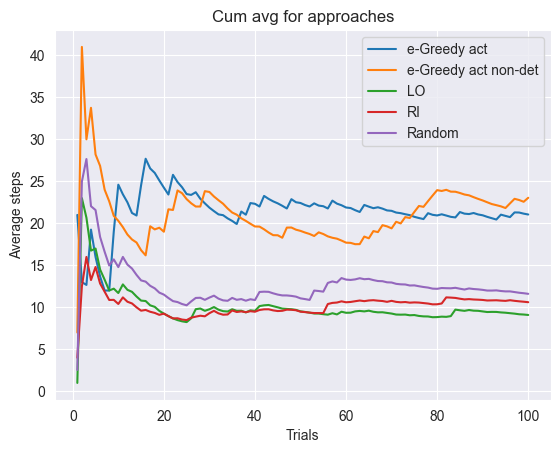

In [11]:
comp_data = {"e-Greedy act": (steps_e_greedy, "-"),
             "e-Greedy act non-det": (steps_e_greedy_non_d, "-"),
             "LO": (stepsLO, "-"),
             "RI": ([step if step != np.inf else 70 for step in stepsRI], "-"),
             "Random": ([step if step != np.inf else 70 for step in stepsRand], "-")}

draw_cumulative_avg_comparison(comp_data)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 29.24it/s]


number of not normalized terms: 2
          sumsquare_error         aic         bic  kl_div  ks_statistic  \
lognorm          0.791990  745.333760 -458.426166     inf      0.098082   
chi2             0.794394  740.176051 -458.129183     inf      0.104596   
gamma            0.794394  740.175879 -458.129160     inf      0.104597   
rayleigh         0.803475  736.813301 -461.600152     inf      0.133611   
norm             0.822646  757.446754 -459.289404     inf      0.158136   

          ks_pvalue  
lognorm    0.283546  
chi2       0.218142  
gamma      0.218128  
rayleigh   0.054952  
norm       0.013159  
{'lognorm': {'s': 0.4246157521633461, 'loc': -3.499716450823475, 'scale': 11.799479535415017}}
Norm distribution: (9.39795918367347, 5.508323564218967)


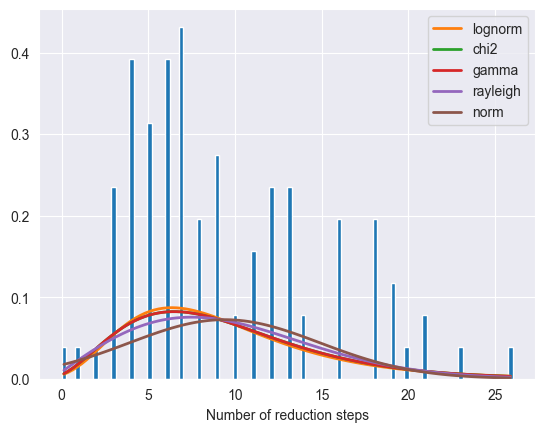

ValueError: autodetected range of [-inf, 3.258096538021482] is not finite

In [16]:
draw_hist(stepsRI)

In [ ]:
draw_hist(stepsRand)